In [1]:
import pandas as pd


In [ ]:
empDf = pd.read_excel('employee.xlsx')

empDf
empDf.head()
empDf.tail()


,Serial,Emp_ID,Designation,Department,Age,Salary
0,1,1101,Manager,Accounts,50.0,200000.0
1,2,1107,Officer,IT,30.0,80000.0
2,3,1203,Officer,HR,28.0,NaN
3,4,1005,Manager,HR,45.0,120000.0
4,5,2123,Office Boy,Accounts,27.0,45000.0
5,6,2451,Accountant,NaN,34.0,100000.0
6,7,1111,Accountant,Accounts,NaN,110000.0
7,8,1001,Officer,IT,25.0,75000.0
8,9,1234,Manager,IT,23.0,NaN
9,10,2156,Engineer,Production,45.0,89000.0


In [16]:
salaryDetails = empDf.Salary.value_counts()

([<matplotlib.patches.Wedge at 0x10d07b7d550>,
 [Text(0.8899186825075615, 0.6465637930815537, '89000.0'),
  Text(-0.339918873399729, 1.0461621095732052, '100000.0'),
  Text(-1.075962433995059, 0.22870251557739363, '45000.0'),
  Text(-1.0048998524068409, -0.4474106465348246, '200000.0'),
  Text(-0.7360435764729569, -0.8174593895313079, '80000.0'),
  Text(-0.33991831634615544, -1.046162290570825, '120000.0'),
  Text(0.1149811954159968, -1.0939740969057303, '110000.0'),
  Text(0.5500003659264656, -0.9526277328950455, '75000.0'),
  Text(0.8899186414035474, -0.6465638496563697, '123000.0'),
  Text(1.0759624539888648, -0.2287024215137656, '90000.0')],
 [Text(0.48541019045866984, 0.35267115986266556, '20.0%'),
  Text(-0.18541029458167035, 0.570633877949021, '20.0%'),
  Text(-0.5868886003609413, 0.12474682667857832, '13.3%'),
  Text(-0.5481271922219131, -0.244042170837177, '6.7%'),
  Text(-0.40147831443979465, -0.44588693974434973, '6.7%'),
  Text(-0.1854099907342666, -0.5706339766749954, '6.7

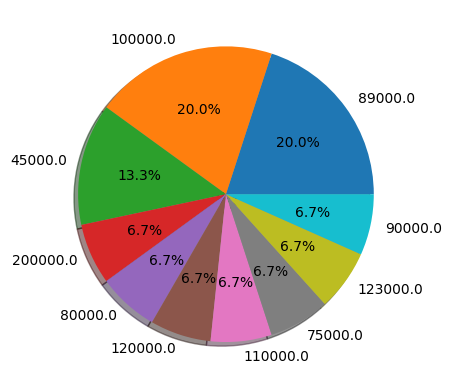

In [19]:
import matplotlib.pyplot as plt

plt.pie(x= salaryDetails.values , labels= salaryDetails.index , autopct= '%1.1f%%' , shadow= True)

In [ ]:
empDf['Salary Bonus'] = empDf['Salary']
empDf['Salary Bonus'] = empDf.apply(lambda val: val['Salary Bonus']* .5 if val['Designation'] == 'Manager' 
                                    else val['Salary Bonus']* .25 if val['Designation'] == 'Engineer' 
                                    else val['Salary Bonus']* .2 if val['Designation'] == 'Officer' else 0 , axis = 1)
empDf

In [27]:
print(empDf.Age.median())

30.0


count    17.000000
mean     34.294118
std       9.719598
min      23.000000
25%      27.000000
50%      30.000000
75%      45.000000
max      50.000000
Name: Age, dtype: float64

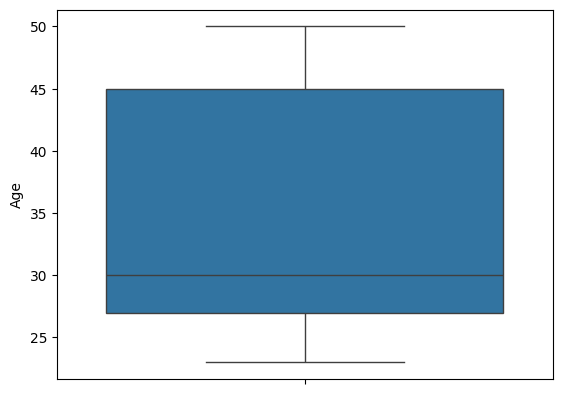

In [33]:
import seaborn as sns

sns.boxplot(empDf.Age)

# Upper line indicates max line
# Lower Line indicates min line
empDf.Age.describe()

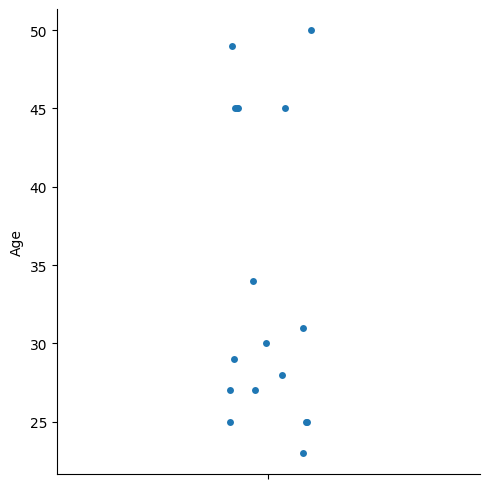

In [31]:
sns.catplot(empDf.Age)

<Axes: ylabel='Age'>

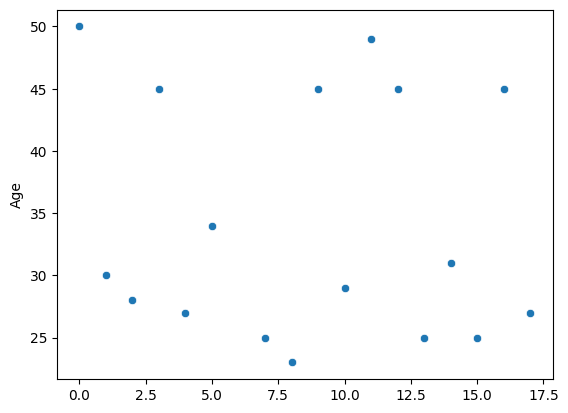

In [32]:
sns.scatterplot(empDf.Age)

In [45]:
empDf.isna().sum()
# empDf.Salary.mode()

Serial          0
Emp_ID          0
Designation     0
Department      2
Age             1
Salary          3
Salary Bonus    3
dtype: int64

In [47]:
empDf.fillna({'Department': empDf.Department.mode()[0] ,
            'Age': empDf.Age.mean(),
            'Salary': empDf.Salary.mean(),
            'Salary Bonus': empDf['Salary Bonus'].mean()}) # to fill the nan values
# mode gives most repeated value in that column [0] firstvalue
#inplace = true directly write on the data frame

,Serial,Emp_ID,Designation,Department,Age,Salary,Salary Bonus
0,1,1101,Manager,Accounts,50.000000,200000.0,100000.0
1,2,1107,Officer,IT,30.000000,80000.0,16000.0
2,3,1203,Officer,HR,28.000000,97000.0,21050.0
3,4,1005,Manager,HR,45.000000,120000.0,60000.0
4,5,2123,Office Boy,Accounts,27.000000,45000.0,0.0
5,6,2451,Accountant,IT,34.000000,100000.0,0.0
6,7,1111,Accountant,Accounts,34.294118,110000.0,0.0
7,8,1001,Officer,IT,25.000000,75000.0,15000.0
8,9,1234,Manager,IT,23.000000,97000.0,21050.0
9,10,2156,Engineer,Production,45.000000,89000.0,22250.0


In [53]:
del empDf['Salary Bonus']  

In [56]:
empDf['Age'].quantile(0.25)

np.float64(27.0)

In [57]:
import numpy as np

print(np.percentile(empDf['Age'] , 25))

nan
